Num. Molduras: 1 | Faltas de Página (fifo): 536
Num. Molduras: 2 | Faltas de Página (fifo): 430
Num. Molduras: 3 | Faltas de Página (fifo): 366
Num. Molduras: 4 | Faltas de Página (fifo): 338
Num. Molduras: 5 | Faltas de Página (fifo): 309
Num. Molduras: 6 | Faltas de Página (fifo): 286
Num. Molduras: 7 | Faltas de Página (fifo): 275
Num. Molduras: 8 | Faltas de Página (fifo): 263
Num. Molduras: 9 | Faltas de Página (fifo): 254
Num. Molduras: 10 | Faltas de Página (fifo): 237
Num. Molduras: 11 | Faltas de Página (fifo): 228
Num. Molduras: 12 | Faltas de Página (fifo): 222
Num. Molduras: 13 | Faltas de Página (fifo): 215
Num. Molduras: 14 | Faltas de Página (fifo): 206
Num. Molduras: 15 | Faltas de Página (fifo): 192
Num. Molduras: 16 | Faltas de Página (fifo): 191
Num. Molduras: 17 | Faltas de Página (fifo): 189
Num. Molduras: 18 | Faltas de Página (fifo): 182
Num. Molduras: 19 | Faltas de Página (fifo): 174
Num. Molduras: 20 | Faltas de Página (fifo): 174
Num. Molduras: 1 | Faltas de 

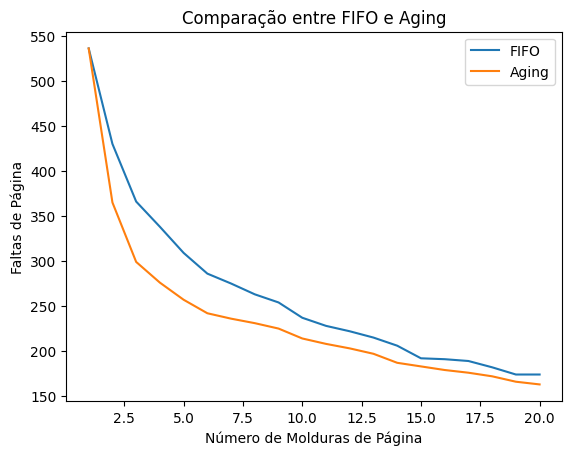

In [139]:
import random
import matplotlib.pyplot as plt
import numpy as np

def fifo(page_references, num_frames):
    """
    Inicializa uma lista vazia chamada frames para representar as molduras de página e uma variável page_faults para contar as faltas de página.
    """
    frames = []
    page_faults = 0

    for page in page_references:
        # se a página não estiver presente nas molduras (frames), ocorre uma falta de página:
        if page not in frames:
            # se o número de molduras ainda não atingiu o máximo (len(frames) < num_frames), a página é simplesmente adicionada às molduras.
            if len(frames) < num_frames:
                frames.append(page)
            # caso contrário, a página mais antiga é removida, e a nova página é adicionada ao final da lista.
            else:
                frames.pop(0)
                frames.append(page)
            #incrementa o contador de faltas de página.
            page_faults += 1

    return page_faults

def aging(page_references, num_frames, aging_bits):
    """
    Implementação do algoritmo de envelhecimento para simulação de substituição de página.
    """
    frames = {}
    page_faults = 0

    for page in page_references:
        if page not in frames:
            if len(frames) < num_frames:
                frames[page] = aging_bits
            else:
                min_page = min(frames, key=frames.get)
                frames.pop(min_page)
                frames[page] = aging_bits
            page_faults += 1

        for p in frames:
            frames[p] >>= 1
            if p == page:
                frames[p] |= (1 << (aging_bits - 1))

    return page_faults

def simulate_page_replacement_algorithm(algorithm, page_references, num_frames, *args):
    """
    Simula a execução de um algoritmo de substituição de página.
    """

    frames = []
    page_faults = 0
    page_faults_per_num_frames = []

    for num_frames in range(1, num_frames + 1):
        page_faults = algorithm(page_references, num_frames, *args)
        page_faults_per_num_frames.append(page_faults)
        print(f"Num. Molduras: {num_frames} | Faltas de Página ({algorithm.__name__}): {page_faults}")

    return page_faults_per_num_frames

def plot_results(num_frames_range, page_faults_fifo, page_faults_aging):
    """
    Gera um gráfico com os resultados da simulação.
    """
    plt.plot(num_frames_range, page_faults_fifo, label='FIFO')
    plt.plot(num_frames_range, page_faults_aging, label='Aging')
    plt.title("Comparação entre FIFO e Aging")
    plt.xlabel('Número de Molduras de Página')
    plt.ylabel('Faltas de Página')
    plt.legend()
    plt.show()

def generate_page_references(num_references, num_pages):
    """
    Gera uma sequência aleatória de referências de página.
    """
    return [random.randint(0, num_pages - 1) for _ in range(num_references)]

def generate_hot_page_references(num_references, num_pages, length):
    """
    Gera uma sequência aleatória de referências de página.
    """
    random.seed(42)

    # paginas "quentes" que serão referenciadas com mais frequência
    hot_pages = int(0.2 * num_pages)  # 20% das páginas serão "quentes"
    cold_pages = num_pages - hot_pages  # 80% das páginas serão "frias"

    # cria uma distribuição onde as páginas "quentes" têm maior probabilidade de serem escolhidas
    hot_weights = np.random.zipf(1.5, hot_pages)
    hot_weights = hot_weights / hot_weights.sum() * 0.8  # 80% de chance de escolher páginas "quentes"

    cold_weights = np.random.zipf(2.5, cold_pages)
    cold_weights = cold_weights / cold_weights.sum() * 0.2  # 20% de chance de escolher páginas "frias"

    weights = np.concatenate([hot_weights, cold_weights])

    # gear referências de página de acordo com as probabilidades calculadas
    return np.random.choice(range(num_pages), size=length, p=weights)

def main():
    num_references = 1000
    num_pages = 100
    aging_bits = 8
    num_frames = 20  # Número máximo de molduras

    #page_references = generate_page_references(num_references, num_pages)
    page_references = generate_hot_page_references(num_references, num_pages, num_references)

    with open("page_references.txt", "w") as file:
        file.write(",".join(map(str, page_references)))

    page_faults_fifo = simulate_page_replacement_algorithm(fifo, page_references, num_frames)
    page_faults_aging = simulate_page_replacement_algorithm(aging, page_references, num_frames, aging_bits)

    plot_results(range(1, num_frames + 1), page_faults_fifo, page_faults_aging)

if __name__ == "__main__":
    main()